In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sta
%matplotlib inline

import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv('Advertising.csv',index_col=0)
data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


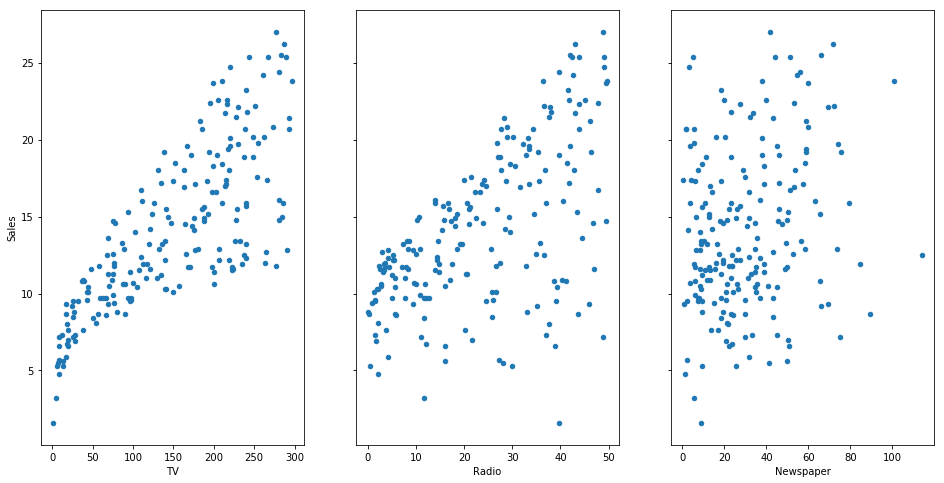

In [7]:

fig, axs=plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])

In [8]:
lm=smf.ols(formula='Sales~TV',data=data).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

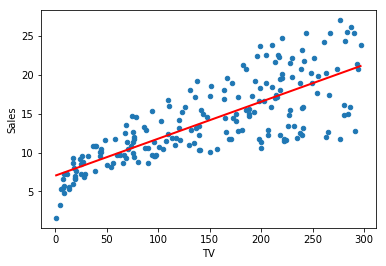

In [9]:
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
preds=lm.predict(X_new)
data.plot(kind='scatter',x='TV',y='Sales')
plt.plot(X_new,preds,c='red',linewidth=2)

In [4]:
# create a fitted model
lm = smf.ols(formula='Sales ~ TV+Radio+Newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [5]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 14 Sep 2017   Prob (F-statistic):           1.58e-96
Time:                        21:31:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
## get the value and covariance of the parameter estimate
hatbeta = lm.params;
covbeta = lm.cov_params();
A = np.matrix(((0,10,0,0), (0,0,1,0)))
# get the cov of the desired combination of params
Acov = A * np.mat(covbeta) * (A.transpose())
Amean = A * (np.mat(hatbeta)).transpose()

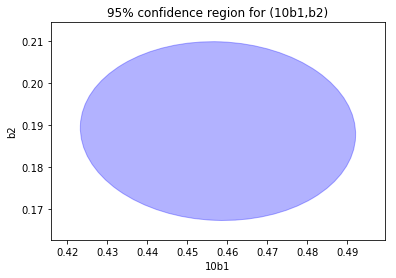

In [9]:
# need a function to plot the ellipse
def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    from matplotlib.patches import Ellipse
    width, height = 2 * np.sqrt(nstd) * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

plot_cov_ellipse(Acov, Amean, 2*sta.f.ppf(0.95, 2, 196), color='blue', alpha=0.3)
# plt.axis('tight')
plt.axis((Amean[0]-3*np.sqrt(Acov[0,0]),Amean[0]+3*np.sqrt(Acov[0,0]),Amean[1]-3*np.sqrt(Acov[1,1]),Amean[1]+3*np.sqrt(Acov[1,1])))
plt.xlabel('10b1')
plt.ylabel('b2')
plt.title('95% confidence region for (10b1,b2)')
plt.show()

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64


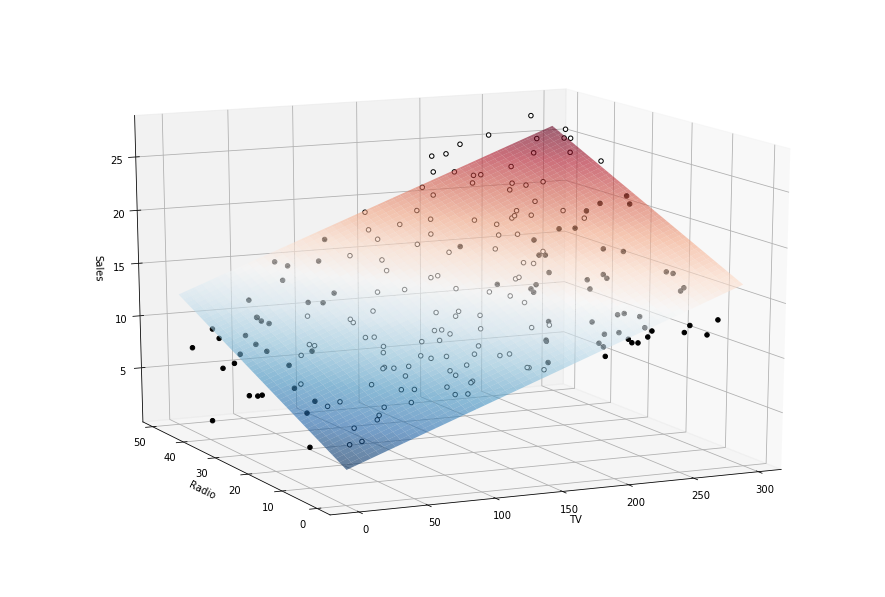

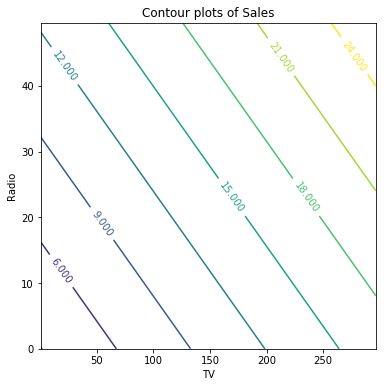

In [10]:
lmnew = smf.ols(formula='Sales ~ TV+Radio', data=data).fit()
xx1, xx2 = np.meshgrid(np.linspace(data.TV.min(), data.TV.max(), 100), 
                       np.linspace(data.Radio.min(), data.Radio.max(), 100))

# plot the hyperplane by evaluating the parameters on the grid
est = lmnew.params;
print(est)
Z = est[0] + est[1] * xx1 + est[2] * xx2

## 3D plot of the sales vs TV and Radio
fig = plt.figure(figsize=(12, 8))
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = lmnew.resid;
ax.scatter(data[resid >= 0].TV, data[resid >= 0].Radio, data[resid >= 0].Sales, color='black', alpha=1.0, facecolor='white')
ax.scatter(data[resid < 0].TV, data[resid < 0].Radio, data[resid < 0].Sales, color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

## contour plot of the sales
plt.figure(figsize=(6,6))
CS = plt.contour(xx1, xx2, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour plots of Sales')
plt.xlabel('TV')
plt.ylabel('Radio')

Intercept    6.750220
TV           0.019101
Radio        0.028860
TV:Radio     0.001086
dtype: float64


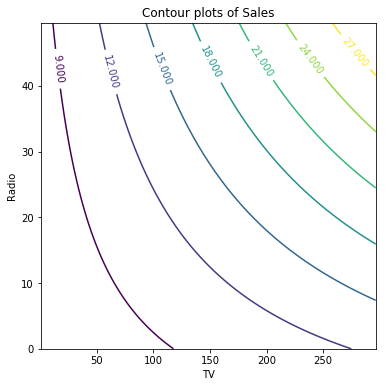

In [11]:
lmint = smf.ols(formula='Sales ~ TV*Radio', data=data).fit()

# plot the hyperplane by evaluating the parameters on the grid
est = lmint.params;
print(est)
Z = est[0] + est[1] * xx1 + est[2] * xx2 + est[3]* xx1 * xx2;

## contour plot of the sales
plt.figure(figsize=(6,6))
CS = plt.contour(xx1, xx2, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour plots of Sales')
plt.xlabel('TV')
plt.ylabel('Radio')

(-16.996067264443226,
 314.09606726444315,
 -1.1617615429661408,
 29.544604179887347)

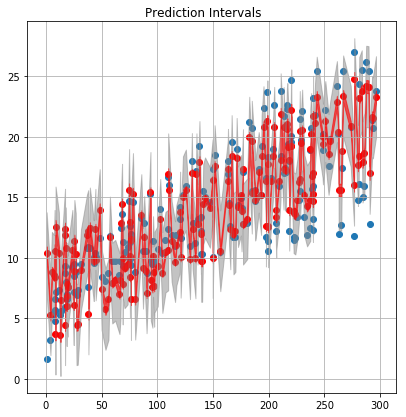

In [12]:
from statsmodels.stats.outliers_influence import summary_table

# get the summary results from the linear regression fit
st, sdata, ss2 = summary_table(lmnew, alpha=0.05)
fittedvalues = sdata[:,2]  # fitted values by the model
predict_mean_se  = sdata[:,3] # standard deviation of the predicted means
predict_mean_ci_low, predict_mean_ci_upp = sdata[:,4:6].T  ## lower and upper limits for the predicted means
predict_ci_low, predict_ci_upp = sdata[:,6:8].T ## lower and upper limits for the predicted observations
## the observation interval can be obtained by builtin function as follows
# from statsmodels.sandbox.regression.predstd import wls_prediction_std
# prstd, predict_ci_low, predict_ci_upp = wls_prediction_std(lm)

## plot the prediction interval
fig, ax = plt.subplots(figsize=(6, 6))
x_pred = data['TV'];
idx = np.argsort(x_pred)
ax.scatter(x_pred, data['Sales'])
fig.suptitle('Prediction Intervals')
fig.tight_layout(pad=2); 
ax.grid(True)
# ax.plot(x_pred.iloc[idx], fittedvalues[idx], '-', color='red', linewidth=2)
ax.scatter(x_pred.iloc[idx], fittedvalues[idx], color='red')
# interval for observations
ax.fill_between(x_pred.iloc[idx], predict_ci_low[idx], predict_ci_upp[idx], color='#888888', alpha=0.5)
# interval for mean responses
ax.fill_between(x_pred.iloc[idx], predict_mean_ci_low[idx], predict_mean_ci_upp[idx], color='red', alpha=0.6)
ax.axis('tight')

Intercept    27.753333
X             0.900000
dtype: float64
Intercept         25.715238
X                  4.976190
np.power(X, 2)    -1.019048
dtype: float64


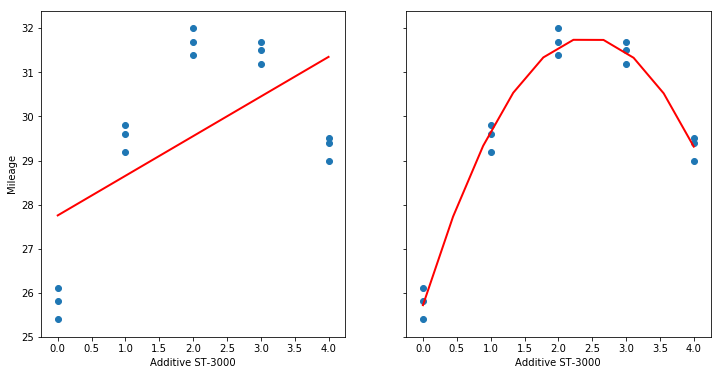

In [13]:
x = np.array([0,0,0,1,1,1,2,2,2,3,3,3,4,4,4])
y = np.array([25.8,26.1,25.4,29.6,29.2,29.8,32.0,31.4,31.7,31.7,31.5,31.2,29.4,29.0,29.5])
data = pd.DataFrame({'X':x, 'Y':y});
linfit = smf.ols(formula='Y~X', data=data).fit()
quafit = smf.ols(formula='Y~X+np.power(X,2)', data=data).fit()

xp = pd.DataFrame({'X':np.linspace(0,4,10)})
lp = linfit.predict(xp)
qp = quafit.predict(xp)

print(linfit.params)
print(quafit.params)

## plot the fit result
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.scatter(data.X, data.Y)
ax1.plot(xp, lp, color='red', linewidth=2)
ax1.set_xlabel('Additive ST-3000')
ax1.set_ylabel('Mileage')
ax2.scatter(data.X, data.Y)
ax2.plot(xp, qp, color='red', linewidth=2)
ax2.set_xlabel('Additive ST-3000')
fig.tight_layout()
plt.show()

       S  X  E  M
0  13876  1  1  1
1  11608  1  3  0
2  18701  1  3  1
3  11283  1  2  0
4  11767  1  3  0
                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.631
Date:                Thu, 14 Sep 2017   Prob (F-statistic):             0.0836
Time:                        21:35:17   Log-Likelihood:                -451.22
No. Observations:                  46   AIC:                             908.4
Df Residuals:                      43   BIC:                             913.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

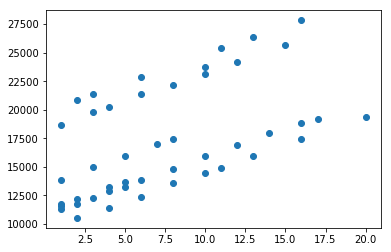

In [14]:
salary = pd.read_table('http://stats191.stanford.edu/data/salary.table', sep='\t',header=0)
print(salary.head())

edufit = smf.ols(formula='S~C(E)', data=salary).fit()
print(edufit.summary())
print(edufit.model.exog[:5])
plt.scatter(salary.X, salary.S)

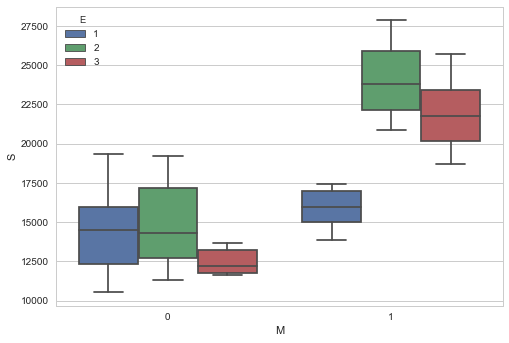

In [15]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(y=salary["S"], x=salary.M, hue=salary.E)
# ax = sns.boxplot(y=salary["S"], x=salary.E)

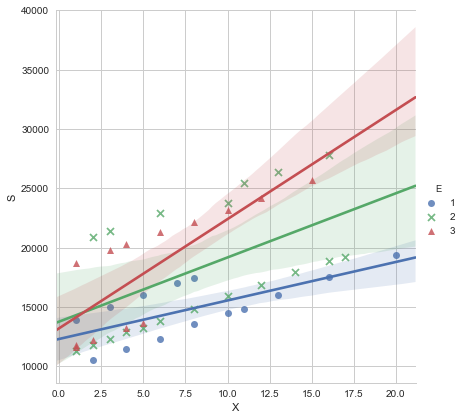

In [16]:
# interaction of E and X in salary
ax = sns.lmplot(x="X", y="S", hue='E', data=salary, size=6, aspect=1, markers=["o", "x", "^"])

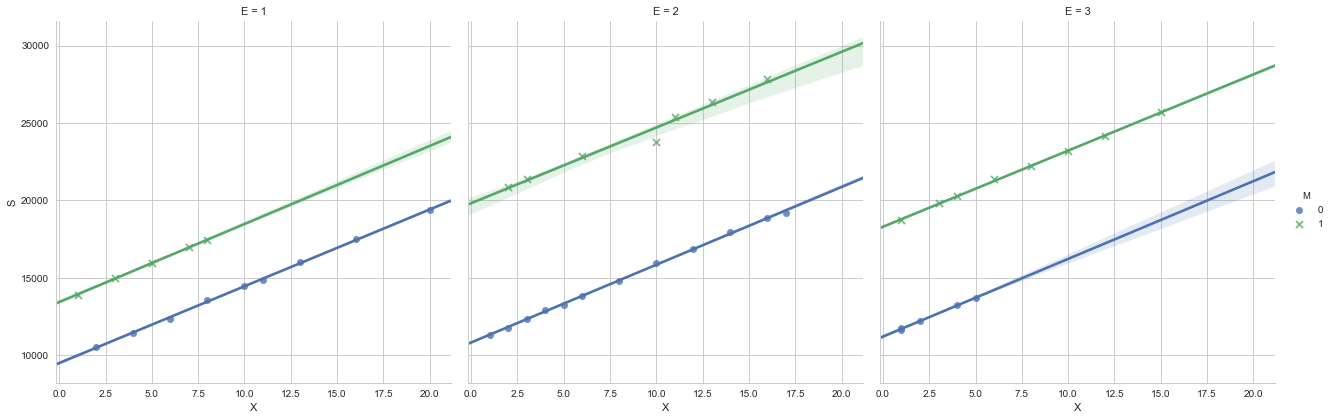

In [17]:
# interaction of X and E given M
# ax = sns.lmplot(x="X", y="S", hue='E', data=salary, col="M", size=6, aspect=1, markers=["o", "x", "^"])
ax = sns.lmplot(x="X", y="S", hue='M', data=salary, col="E", size=6, aspect=1, markers=["o", "x"])

In [18]:
## fit the model with interactions considered
salaryfit = smf.ols(formula="S~C(E)*C(M)+X", data=salary).fit()

print(salaryfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5517.
Date:                Thu, 14 Sep 2017   Prob (F-statistic):           1.67e-55
Time:                        21:36:16   Log-Likelihood:                -298.74
No. Observations:                  46   AIC:                             611.5
Df Residuals:                      39   BIC:                             624.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            9472.6854    